In [1]:
'''
Name : Ayush Bansal
Roll No: 15CS30006

Assignment 1b
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df= pd.read_csv('Iris_Data.csv')
df.head()

'''
You will not import any other library other than these provided.

We provide the iris_dataset for the classification task
There are 4 dependent variables columns(1-4).
The last column (category of the flower) is what we wish to predict

The first part of this task is similar to assignment 1 a
'''
# reads the file and stores in 2 numpy arrays.
# X has the input features and Y has the output value in numpy array

X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

rows,cols= X.shape[0], X.shape[1] #?, #? 
# how to get the number of rows and columns in the dataset.
# Rows correspond to the number of input instances, columns correspond to the feature of an input

print(rows,cols)

np.random.seed(42) # to ensure that the same seed is generated

# write code to shuffle the dataset

def shuffle_dataset(X,Y):
    shuffle_state = np.random.get_state()
    np.random.shuffle(X)
    np.random.set_state(shuffle_state)
    np.random.shuffle(Y)
    
    '''
        Write code to shuffle the dataset here. 
        
        Args: 
            X: Input feature ndarray
            Y: Input values ndarray
            
        Return:
            X and Y shuffled in place
    
    '''
    
    pass
shuffle_dataset (X,Y) #This line should be added to shuffle the dataset
training_size = int(0.8*rows)
X_train = X[:training_size]
y_train = Y[:training_size]
X_test = X[training_size:]
y_test = Y[training_size:]

150 4


## Defining the Feed Forward Neural Network class

In [2]:
class NeuralNetwork(object):
    
    def __init__(self, input_no, hidden_no, output_no ):
        '''
            Initialize the Neural network model 
            Args:
                input_no : no of input features (no of cols)
                hidden_no: no of hidden nodes in the model
                output_no: no of categories our model can classify
                      
        
        '''
        self.h= 0 # Initialize the hidden layer with zero ?
        self.w1= np.random.uniform(0,0.01,(input_no,hidden_no)) # Initialize the weights from the input to the hidden layer uniformly with values between 0 and 0.01  ?
        self.b1= np.random.uniform(0,0.01,hidden_no) # Initialize the biases uniformly with values between 0 and 0.01 equal to the number of hidden nodes  ?
        self.w2= np.random.uniform(0,0.01,(hidden_no,output_no)) # Initialize the weights from the hidden layer to the output uniformly with values between 0 and 0.01 ? 
        self.b2= np.random.uniform(0,0.01,output_no) # Initialize the biases uniformly with values between 0 and 0.01 equal to the number of output categories ?
        pass

    
    def _softmax(self,z):
        return np.exp(z)/np.sum(np.exp(z),axis=-1).reshape(-1,1)
        
    def forward(self, x):
        '''
            Do a forward pass on the NN model 
            Args: 
                x : Input feature matrix 
                
            Return:
                y_pred : list of predicted probabilities of x

                h= relu(w1.x+b1) 
                y_pred = softmax(w2.h+b2)
                
        
        '''
        #y_pred=[]
        #print(x.shape)
        self.h = x.dot(self.w1) + self.b1
        self.h = np.maximum(0,self.h)
        #print(self.h.shape)
        y_pred = self.h.dot(self.w2) + self.b2
        #print(y_pred.shape)
        y_pred = self._softmax(y_pred)
        #print(y_pred.shape)
        return y_pred
        pass
    
    def backward(self, x, y_train, y_pred, lr):
        
        '''
            Do a backward pass on the NN model. 
            Computes all gradients and updates the parameters w1, b1, w2, b2
            
            Args:
                x: input matrix X 
                y_train: actual category of the feature/ data point
                y_pred: predicted probabilities of the categories obtained during forward pass
                lr: learning rate        
        '''
        scores = y_pred[np.arange(y_pred.shape[0]),y_train]
        loss = - np.mean(np.log(scores))
        
        h_temp = x.dot(self.w1) + self.b1
        h = np.maximum(0,h_temp)
        
        dsoft = y_pred
        dsoft[np.arange(y_train.shape[0]),y_train] -= 1
        dsoft /= y_train.shape[0]
        
        
        grad_b2 = np.sum(dsoft,axis=0)
        grad_w2 = h.T.dot(dsoft)
        
        grad_h = dsoft.dot(self.w2.T)
        grad_h[h_temp<=0] = 0
        
        grad_b1 = np.sum(grad_h,axis=0)
        grad_w1 = x.T.dot(grad_h)
        
        
        #Update
        self.w1 -= lr*grad_w1
        self.b1 -= lr*grad_b1
        self.w2 -= lr*grad_w2
        self.b2 -= lr*grad_b2 
        pass
             

        
def crossEntropy_loss(y_pred, y_train,num_classes = 3):
    '''
        Computes the cross entropy loss between the predicted values and the actual values
        
        Args:
            y_pred: predicted probabilities of the categories obtained during forward pass
            y_train: actual category of the feature/ data point
    
    '''
    loss = 0
    scores = y_pred[np.arange(y_pred.shape[0]),y_train]
    loss = - np.mean(np.log(scores))
    return loss
    pass

def accuracy(y_pred,y_train):
    '''
        Computes the accuracy between the predicted values and actual labels
    
        Args:
            y_pred: predicted probabilities of the categories obtained during forward pass
            y_train: actual category of the feature/ data point

    '''
    classes = np.argmax(y_pred,axis=1)
    acc= np.sum(classes == y_train)/y_train.shape[0]
    return acc
    pass
        


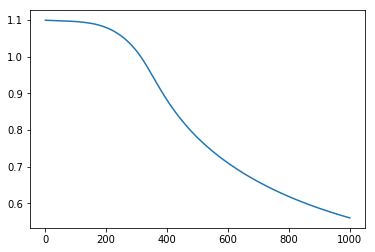

Final train_loss 0.5600947938930718
Final train_accuracy 0.7083333333333334
Testloss 0.5836418383764547
Accuracy is 0.6666666666666666


In [3]:
# Initialize the neural network model and specify the parameters 
hidden_nodes=32

nnobj= NeuralNetwork(cols,hidden_nodes,3)       
epochs = 1000
learning_rate = 1e-2
loss_history = []
epoch_history = []

# Gradient Descent
for e in range(epochs):
    yPred= nnobj.forward(X_train)
    loss_history.append(crossEntropy_loss(yPred, y_train))
    epoch_history.append(e+1)
    nnobj.backward(X_train, y_train,yPred, lr=learning_rate)
    
plt.plot(epoch_history, loss_history)
plt.show()

ypred = nnobj.forward(X_train)
train_loss= crossEntropy_loss(ypred, y_train) #?
train_accuracy= accuracy(ypred,y_train) #?
test_pred = nnobj.forward(X_test)
test_loss= crossEntropy_loss(test_pred,y_test) # ?
test_accuracy= accuracy(test_pred,y_test) #?

print("Final train_loss "+ str(train_loss))    
print("Final train_accuracy "+ str(train_accuracy))    
print("Testloss " + str(test_loss))
print("Accuracy is "+ str(test_accuracy))

        
            